In [6]:
import pandas as pd

# Load the first dataset
df_match_winner = pd.read_csv('Match Winner.csv')

# Unwanted Columns List
unwanted_cols = ['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'MW', 'HTFormPtsStr', 'ATFormPtsStr', 'HTFormPts', 'ATFormsPts', 'HTWinStreak3' ,'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5']
df_match_winner_cleaned = df_match_winner.drop(columns=unwanted_cols, errors='ignore')

# Required Feature List
print("\nThis is the NEW, CLEANED dataframe:")
df_match_winner_cleaned.head()


This is the NEW, CLEANED dataframe:


,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,...,AM1,AM2,AM3,AM4,AM5,ATFormPts,HTGD,ATGD,DiffPts,DiffFormPts
0,H,0,0,0,0,0.0,0.0,M,M,M,...,M,M,M,M,M,0,0.0,0.0,0.0,0.0
1,H,0,0,0,0,0.0,0.0,M,M,M,...,M,M,M,M,M,0,0.0,0.0,0.0,0.0
2,NH,0,0,0,0,0.0,0.0,M,M,M,...,M,M,M,M,M,0,0.0,0.0,0.0,0.0
3,NH,0,0,0,0,0.0,0.0,M,M,M,...,M,M,M,M,M,0,0.0,0.0,0.0,0.0
4,H,0,0,0,0,0.0,0.0,M,M,M,...,M,M,M,M,M,0,0.0,0.0,0.0,0.0


In [7]:
# Exporting cleaned dataset to Excel Sheet
df_match_winner_cleaned.to_excel('cleaned_match_winner_data.xlsx', index=False)

In [8]:
# Checking for NULL Values
df_match_winner_cleaned.isnull().sum()

FTR            0
HTGS           0
ATGS           0
HTGC           0
ATGC           0
HTP            0
ATP            0
HM1            0
HM2            0
HM3            0
HM4            0
HM5            0
AM1            0
AM2            0
AM3            0
AM4            0
AM5            0
ATFormPts      0
HTGD           0
ATGD           0
DiffPts        0
DiffFormPts    0
dtype: int64

In [6]:
# Check for any duplicate Rows
match_winner_dupes = df_match_winner_cleaned.duplicated().sum()
print(f"Goals and Assists Data has: {match_winner_dupes} duplicate rows")

Goals and Assists Data has: 201 duplicate rows


In [7]:
# Dropping the Duplicate Rows
print("\nDropping duplicates...")
df_match_winner_cleaned = df_match_winner_cleaned.drop_duplicates()
print(f"Match data new duplicate count: {df_match_winner_cleaned.duplicated().sum()}")


Dropping duplicates...
Match data new duplicate count: 0


In [8]:
# Checking For Outliers
print("--- Match Winner Data (Outlier Check) ---")
df_match_winner_cleaned.describe()

--- Match Winner Data (Outlier Check) ---


,HTGS,ATGS,HTGC,ATGC,HTP,ATP,ATFormPts,HTGD,ATGD,DiffPts,DiffFormPts
count,6639.000000,6639.000000,6639.000000,6639.000000,6639.000000,6639.000000,6639.000000,6639.000000,6639.000000,6639.000000,6639.000000
mean,25.152884,25.251996,25.234373,25.080584,1.243961,1.261424,6.602802,-0.008929,0.014753,-0.017464,-0.017805
std,16.899263,16.853352,16.083548,16.026097,0.495933,0.487906,3.428071,0.702314,0.702252,0.676500,0.411230
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,-3.333333,-2.363636,-2.250000
25%,12.000000,12.000000,12.000000,12.000000,0.913043,0.933333,4.000000,-0.500000,-0.480000,-0.470588,-0.181818
50%,23.000000,23.000000,24.000000,24.000000,1.190476,1.200000,6.000000,-0.100000,-0.076923,0.000000,0.000000
75%,36.000000,36.000000,37.000000,36.000000,1.571429,1.573593,9.000000,0.416667,0.444444,0.440588,0.161290
max,102.000000,105.000000,85.000000,82.000000,2.736842,2.761905,15.000000,4.000000,3.500000,2.285714,2.250000


Plotting boxplots for all 11 numeric columns in df_league:



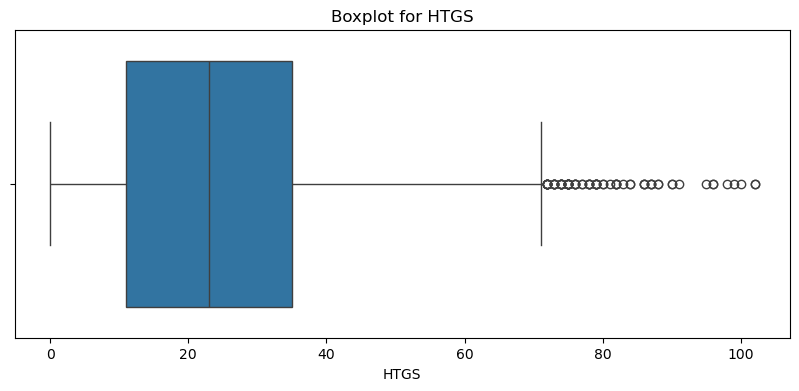

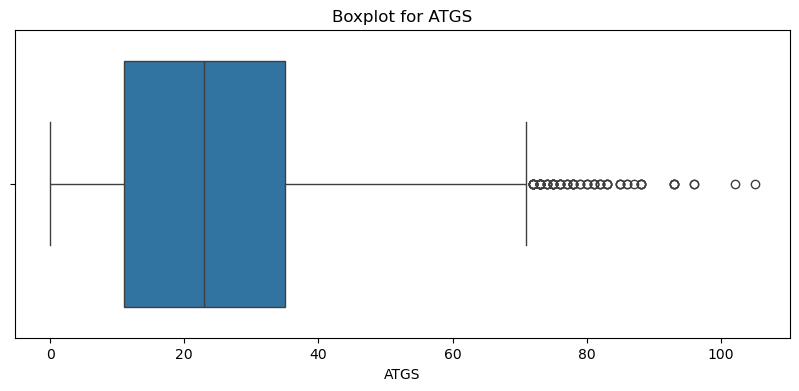

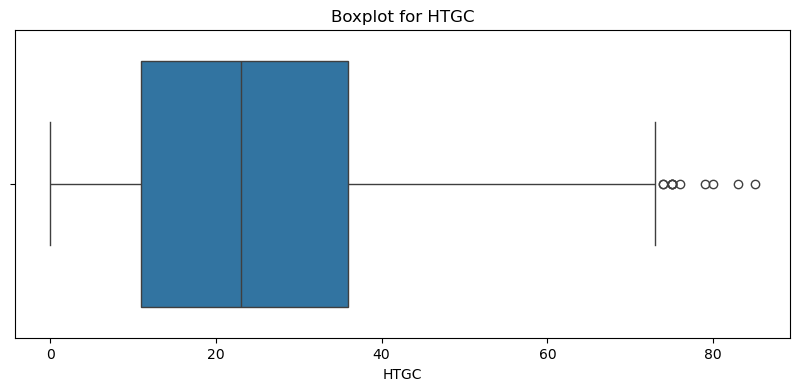

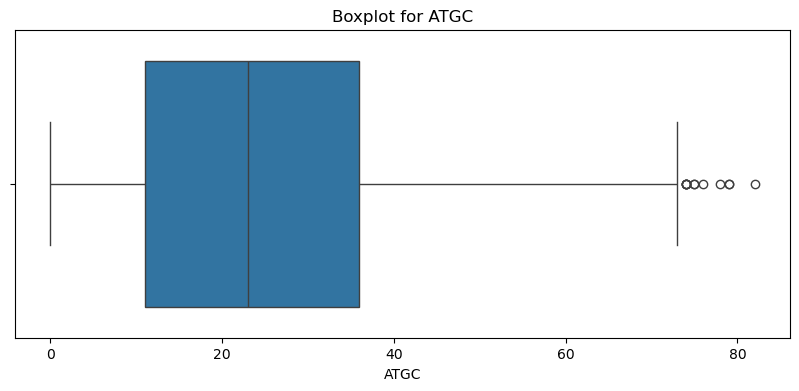

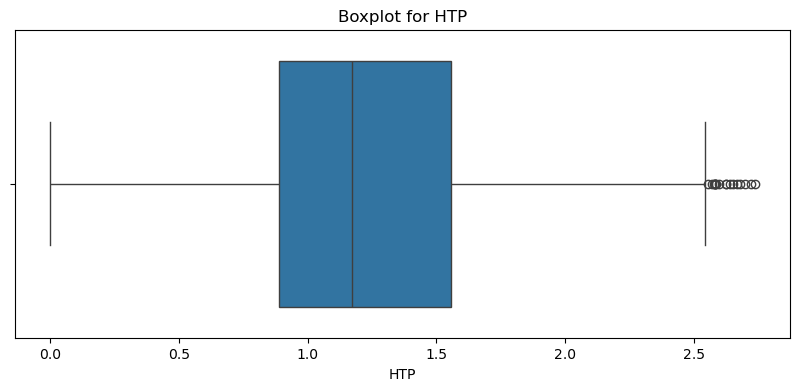

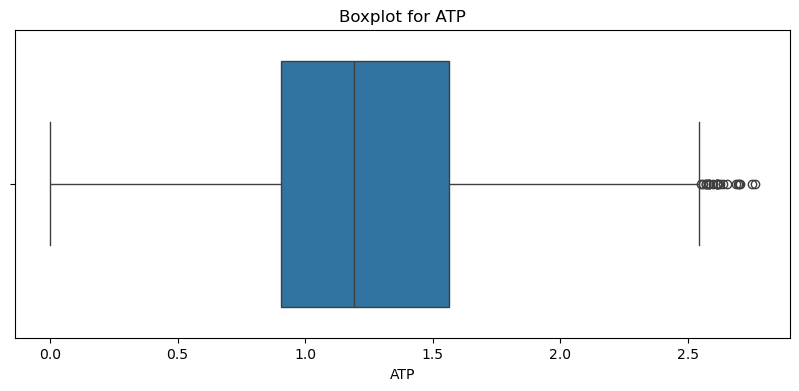

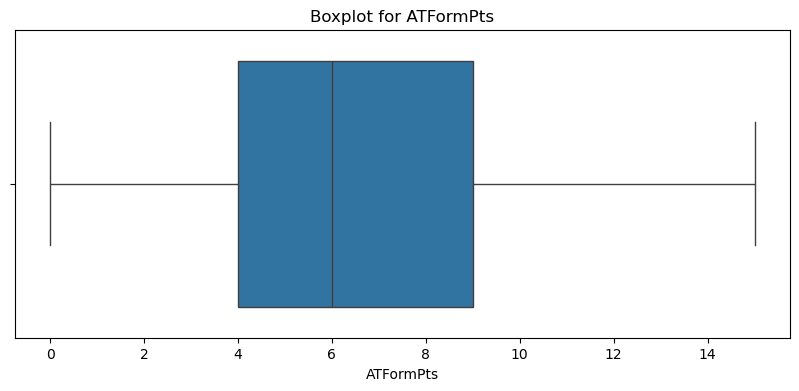

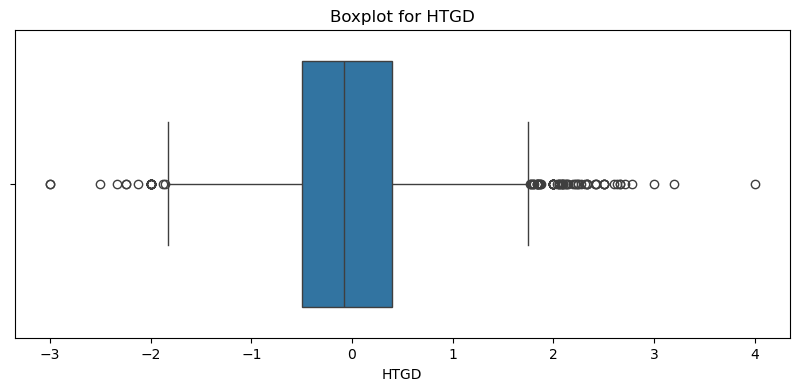

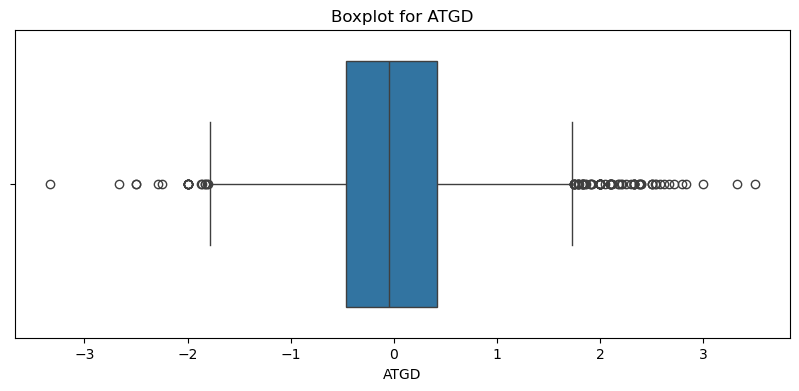

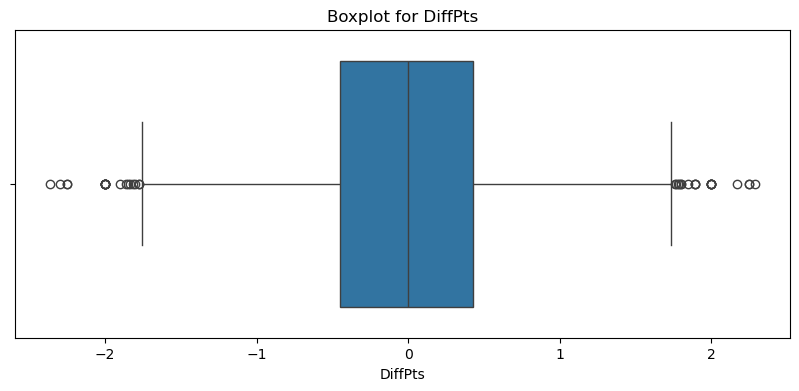

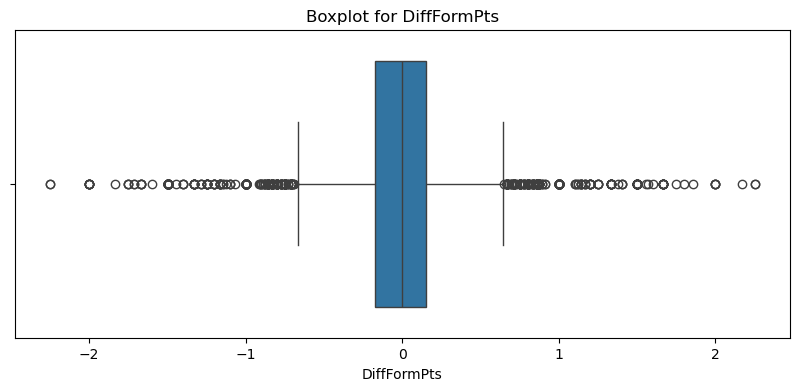


--- All numeric columns have been plotted. ---


In [9]:
# Plotting BoxPlots for all the Numerical Features
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

# Get a list of all columns that are numbers (int64 or float64)
numeric_cols = df_match_winner_cleaned.select_dtypes(include=[np.number]).columns

print(f"Plotting boxplots for all {len(numeric_cols)} numeric columns in df_league:\n")

for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df_match_winner_cleaned[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.show()

print("\n--- All numeric columns have been plotted. ---")

In [10]:
# Removing Outliers
import pandas as pd
import numpy as np

def remove_outliers_iqr_targeted(df, columns_to_check):
    """
    Removes outliers from a DataFrame based on the IQR rule,
    but only for the columns specified in columns_to_check.
    A row is kept ONLY if it is within the IQR bounds for ALL specified columns.
    """
    df_original = df.copy()
    df_filtered = df.copy()
    
    print(f"Original shape: {df_original.shape}")
    
    for col in columns_to_check:
        Q1 = df_filtered[col].quantile(0.25)
        Q3 = df_filtered[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        
        # Keep rows that are WITHIN the bounds for this column
        df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & 
                                  (df_filtered[col] <= upper_bound)]
    
    # Identify removed rows by checking which indices are missing from df_filtered
    df_removed = df_original.drop(df_filtered.index)

    print(f"\nNew shape after trimming: {df_filtered.shape}")
    print(f"Total rows removed: {len(df_removed)}")
    
    return df_filtered, df_removed

# --- Main script ---
print("--- Processing Match Winner Data ---")
try:
    # Load the data
    df_match_cleaned = pd.read_excel("cleaned_match_winner_data.xlsx")
    print(f"Loaded data: {df_match_cleaned.shape}")

    cols_to_trim_match = [
        'HTGD', 
        'ATGD', 
        'DiffPts', 
        'DiffFormPts'
    ]
    
    # Unpack return values
    df_match_trimmed, df_outliers = remove_outliers_iqr_targeted(df_match_cleaned, cols_to_trim_match)
    
    # Save to Excel
    df_match_trimmed.to_excel("match_data_trimmed_outliers.xlsx", index=False)
    df_outliers.to_excel("match_data_REMOVED_outliers.xlsx", index=False)
    
    print("\nProcessing complete.")
    print("1. Clean data saved to: match_data_trimmed_outliers.xlsx")
    print("2. Removed rows saved to: match_data_REMOVED_outliers.xlsx")

except FileNotFoundError:
    print("Error: 'cleaned_match_winner_data.xlsx' not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Processing Match Winner Data ---
Loaded data: (6840, 22)
Original shape: (6840, 22)

New shape after trimming: (6056, 22)
Total rows removed: 784

Processing complete.
1. Clean data saved to: match_data_trimmed_outliers.xlsx
2. Removed rows saved to: match_data_REMOVED_outliers.xlsx


--- Plotting Boxplots for Match Winner Data ---
Loaded 'match_data_trimmed_outliers.xlsx': (6056, 22)
Plotting boxplots for all 11 numeric columns after removing outliers:



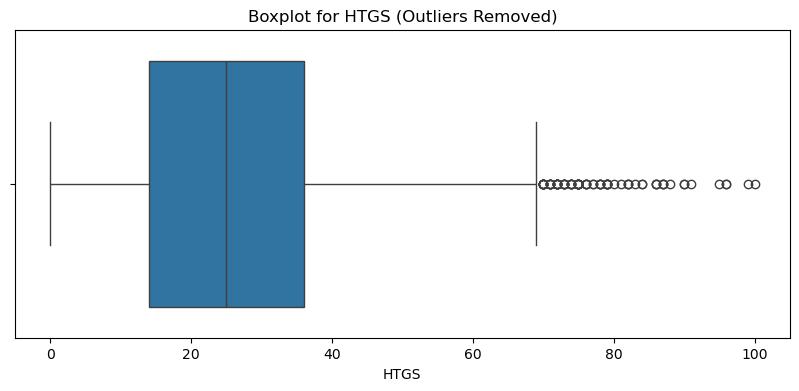

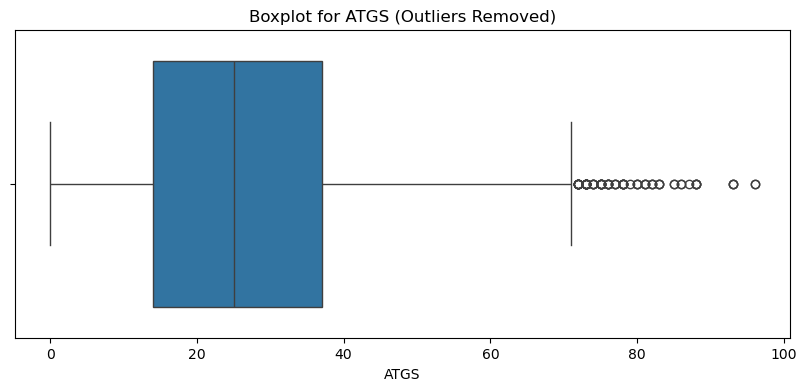

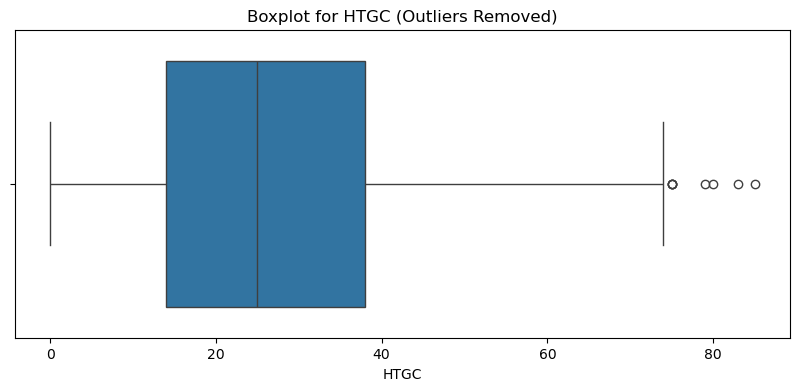

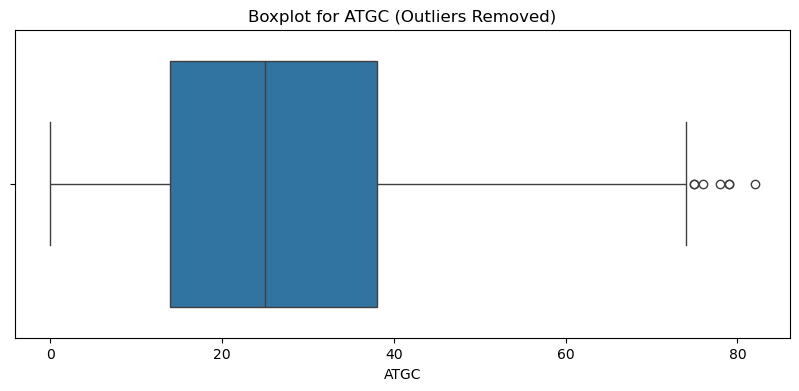

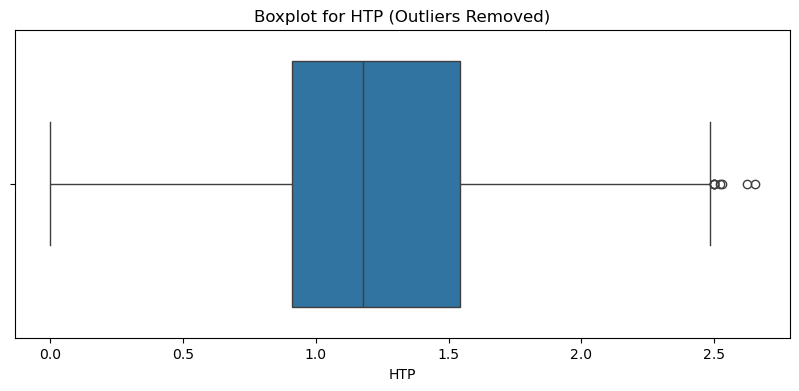

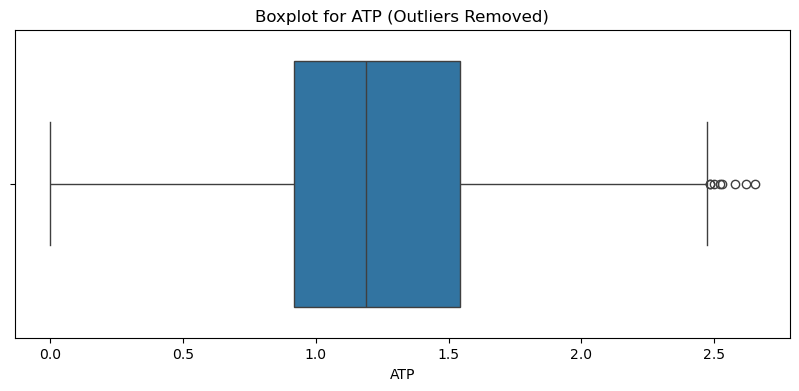

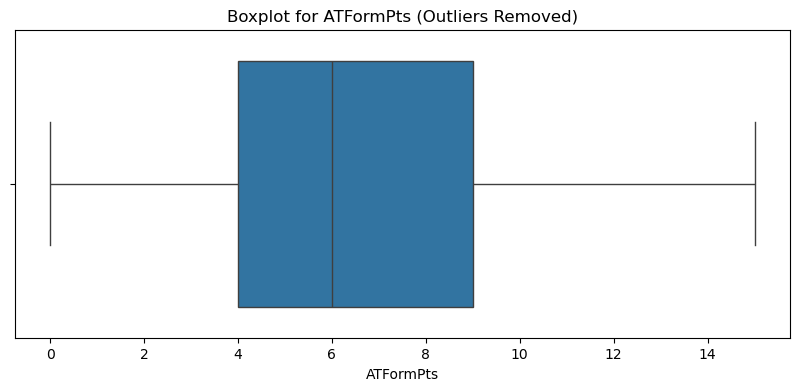

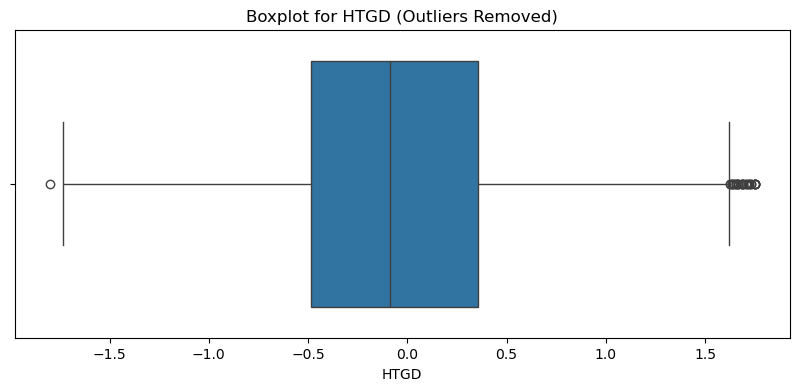

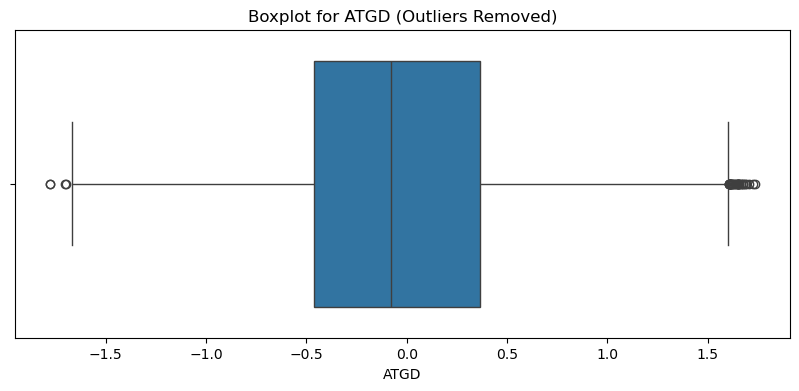

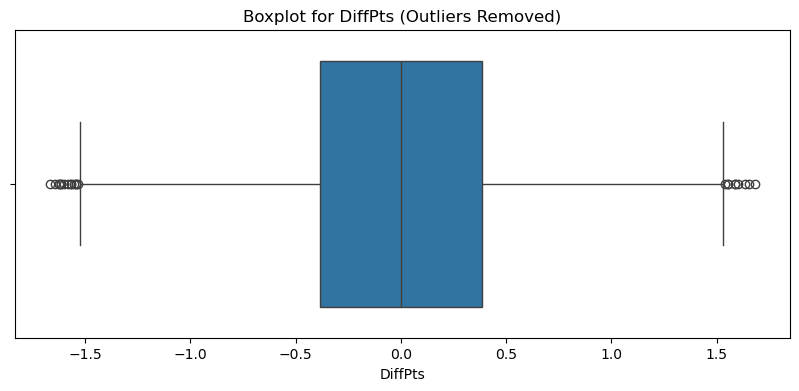

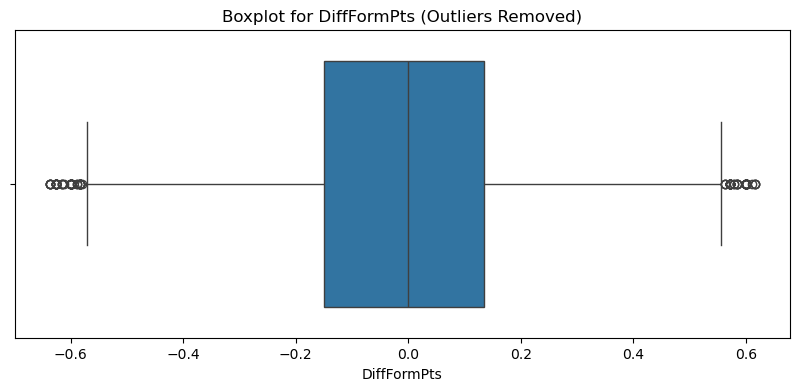


--- All numeric columns have been plotted. ---


In [11]:
# Plotting BoxPlots for all the Numerical Features after removing outliers (Match Data)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns      

print("--- Plotting Boxplots for Match Winner Data ---")

try:
    # 1. Load the trimmed match data
    df_match_trimmed = pd.read_excel("match_data_trimmed_outliers.xlsx")
    print(f"Loaded 'match_data_trimmed_outliers.xlsx': {df_match_trimmed.shape}")

    # 2. Get a list of all columns that are numbers (int64 or float64)
    numeric_cols = df_match_trimmed.select_dtypes(include=[np.number]).columns

    print(f"Plotting boxplots for all {len(numeric_cols)} numeric columns after removing outliers:\n")
    
    for col in numeric_cols:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=df_match_trimmed[col])
        plt.title(f'Boxplot for {col} (Outliers Removed)')
        plt.xlabel(col)
        plt.show()
        
    print("\n--- All numeric columns have been plotted. ---")

except FileNotFoundError:
    print("Error: 'match_data_trimmed_outliers.xlsx' not found.")
    print("Please ensure you have run the outlier removal script first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [12]:
# Categorical Features Analysis
import pandas as pd
import numpy as np

# --- Main script ---
print("--- Categorical Analysis for Trimmed Match Data ---")

try:
    df_match_trimmed = pd.read_excel("match_data_trimmed_outliers.xlsx")

    # 1. Analyze 'FTR' (Full Time Result)
    print("\nUnique 'FTR' (Full Time Result) values and their counts:")
    print(df_match_trimmed['FTR'].value_counts())
    
    # 2. Analyze 'HM1' (Home Team Last Match Result)
    print("\nUnique 'HM1' values and their counts:")
    print(df_match_trimmed['HM1'].value_counts())
    
    # 3. Analyze 'AM1' (Away Team Last Match Result)
    print("\nUnique 'AM1' values and their counts:")
    print(df_match_trimmed['AM1'].value_counts())
    
    print("\n--- Match categorical analysis complete ---")

except FileNotFoundError:
    print("Error: 'match_data_trimmed_outliers.xlsx' not found.")
    print("Please make sure you have successfully run 'process_match_data.py' first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Categorical Analysis for Trimmed Match Data ---

Unique 'FTR' (Full Time Result) values and their counts:
FTR
NH    3247
H     2809
Name: count, dtype: int64

Unique 'HM1' values and their counts:
HM1
L    2400
W    1925
D    1551
M     180
Name: count, dtype: int64

Unique 'AM1' values and their counts:
AM1
W    2350
L    2013
D    1513
M     180
Name: count, dtype: int64

--- Match categorical analysis complete ---


--- Match Data: Relationship Analysis ---
Loaded 'match_data_trimmed_outliers.xlsx': (6056, 22)

--- Correlation Matrix (Trimmed Match Data) ---


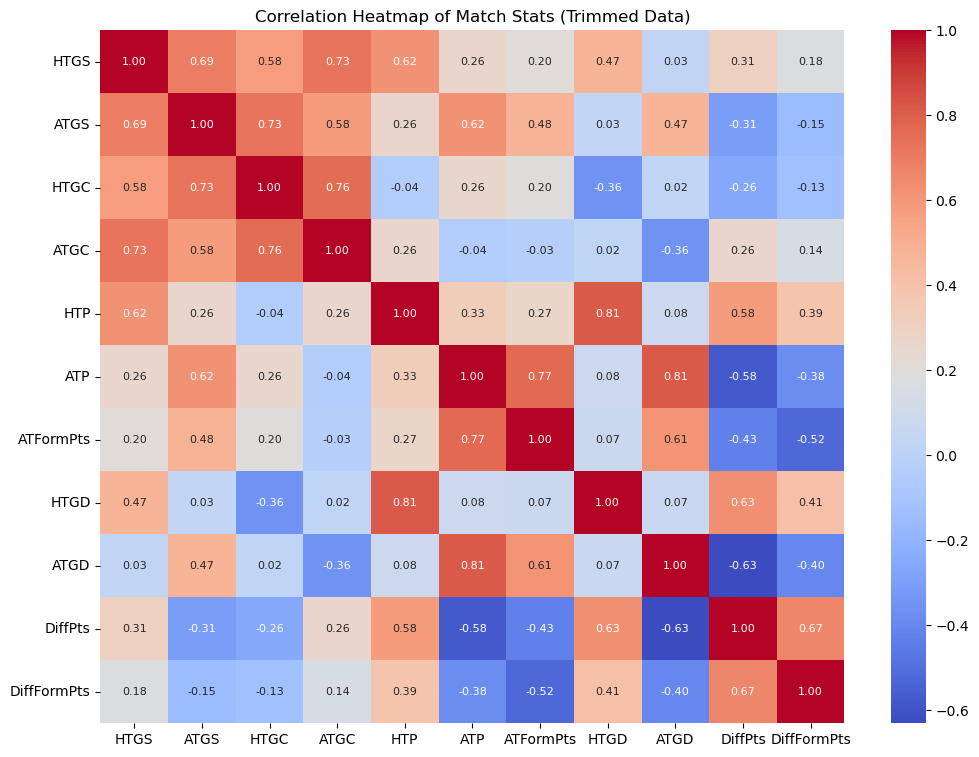


--- Average Match Stats by Full Time Result (FTR) ---
      DiffPts      HTGD      ATGD  DiffFormPts
FTR                                           
H    0.176927  0.119373 -0.155231     0.042905
NH  -0.165963 -0.154246  0.102082    -0.052932

--- Impact of Home Team's Last Match (HM1) on Result (FTR) ---
FTR       H      NH
HM1                
D    41.07%  58.93%
L    41.21%  58.79%
W     57.4%   42.6%

--- Match relationship analysis complete ---


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Main script ---
print("--- Match Data: Relationship Analysis ---")

try:
    # 1. Load the data
    df_match_trimmed = pd.read_excel("match_data_trimmed_outliers.xlsx")
    print(f"Loaded 'match_data_trimmed_outliers.xlsx': {df_match_trimmed.shape}")

    # 2. Correlation Matrix
    print("\n--- Correlation Matrix (Trimmed Match Data) ---")
    
    # Select only numeric columns
    numeric_cols = df_match_trimmed.select_dtypes(include=[np.number])
    corr_matrix = numeric_cols.corr()
    
    # Create a heatmap
    plt.figure(figsize=(12, 9))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                annot_kws={"size": 8})
    plt.title('Correlation Heatmap of Match Stats (Trimmed Data)')
    plt.show()

    # 3. Categorical vs. Numeric (Grouped Averages)
    print("\n--- Average Match Stats by Full Time Result (FTR) ---")
    # Group by 'FTR' and get the average of the most important predictive features
    key_features = ['DiffPts', 'HTGD', 'ATGD', 'DiffFormPts']
    print(df_match_trimmed.groupby('FTR')[key_features].mean())

    # 4. Categorical vs. Categorical (Cross-Tabulation)
    print("\n--- Impact of Home Team's Last Match (HM1) on Result (FTR) ---")
    
    # We filter out 'M' (Missing/Start of Season) as it's not meaningful 'form'
    form_data = df_match_trimmed[df_match_trimmed['HM1'] != 'M']
    
    # Create a cross-tabulation and normalize by 'index' (by row) to get percentages
    # This shows "Given the HM1 result, what % of time did FTR=H or FTR=NH occur?"
    cross_tab = pd.crosstab(form_data['HM1'], form_data['FTR'], normalize='index')
    
    # Format as percentage
    print(cross_tab.mul(100).round(2).astype(str) + '%')

    print("\n--- Match relationship analysis complete ---")

except FileNotFoundError:
    print("Error: 'match_data_trimmed_outliers.xlsx' not found.")
    print("Please make sure you have successfully run 'process_match_data.py' first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [15]:
#Save to Excel
df_match_trimmed.to_excel('match_data_trimmed_outliers.xlsx', index=False)

XGBoost not found. Skipping XGBoost model.
--- Training & Visualizing Classification Models ---
Loaded data: (6056, 22)

  TRAINING MODELS & GENERATING CONFUSION MATRICES
Training Logistic Regression...
Training Random Forest...
Training Gradient Boosting...
Training SVM (Linear)...
Training KNN (Neighbors)...

Displaying Confusion Matrices...


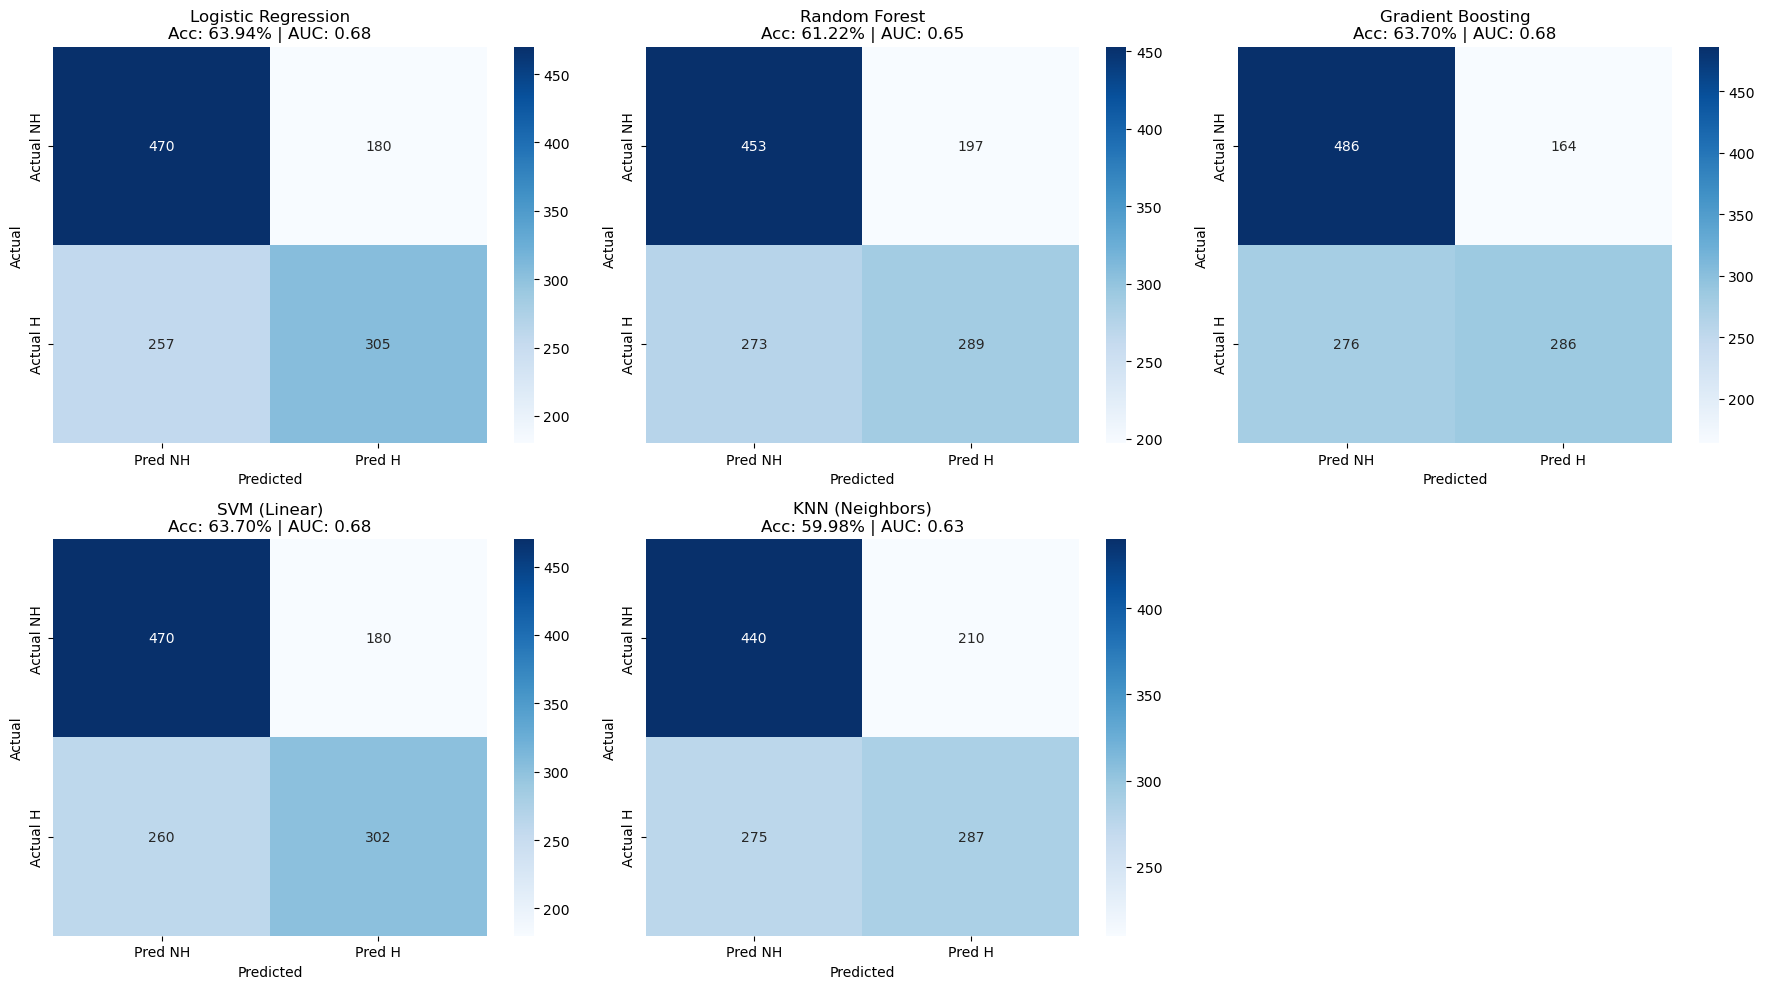


  GENERATING ROC CURVES
Displaying ROC Curves...


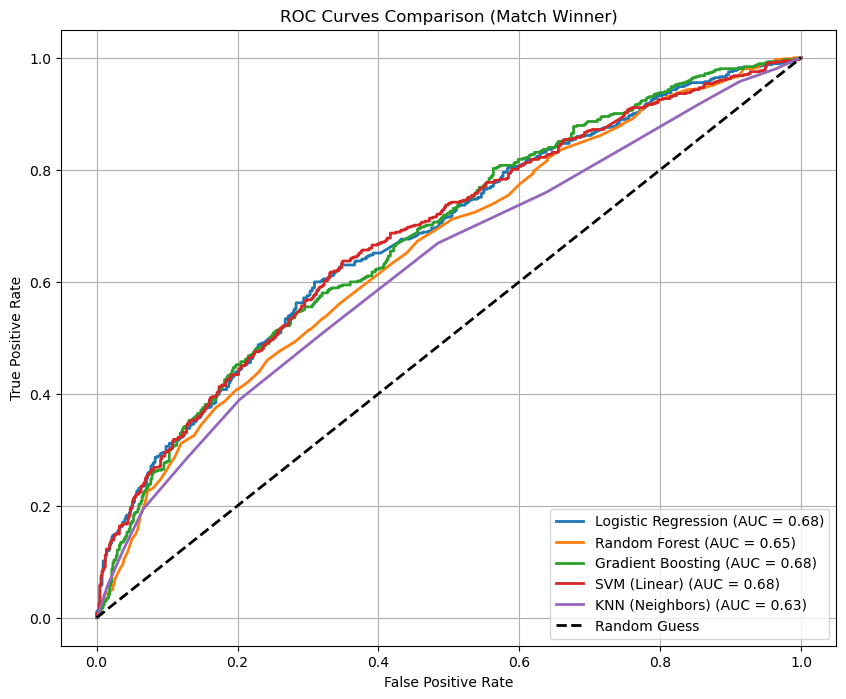


--- Final Leaderboard (Sorted by AUC) ---
              Model  Test Accuracy  Test ROC-AUC
       SVM (Linear)       0.636964      0.681502
Logistic Regression       0.639439      0.680498
  Gradient Boosting       0.636964      0.678817
      Random Forest       0.612211      0.654873
    KNN (Neighbors)       0.599835      0.627198


In [16]:
# Multiple Model Trainings for Match Winner
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Try importing XGBoost
try:
    import xgboost as xgb
    has_xgb = True
except ImportError:
    has_xgb = False
    print("XGBoost not found. Skipping XGBoost model.")

# --- Main Script ---
print("--- Training & Visualizing Classification Models ---")

try:
    # 1. Load Data
    df = pd.read_excel("match_data_trimmed_outliers.xlsx")
    print(f"Loaded data: {df.shape}")

    # 2. Feature Engineering
    df['FTR_numeric'] = df['FTR'].map({'H': 1, 'NH': 0})
    y = df['FTR_numeric']
    X = df.drop(columns=['FTR', 'FTR_numeric'])
    
    categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
    numeric_cols = [col for col in X.columns if X[col].dtype != 'object']

    # 3. Preprocessing Pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)
        ]
    )

    # 4. Define Models
    models = {
        "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
        "SVM (Linear)": SVC(kernel='linear', probability=True, random_state=42),
        "KNN (Neighbors)": KNeighborsClassifier(n_neighbors=15)
    }
    if has_xgb:
        models["XGBoost"] = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

    # 5. Train & Evaluate
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    model_results = []
    
    # --- PLOT 1: CONFUSION MATRIX GRID ---
    # Create figure for confusion matrices
    num_models = len(models)
    rows = (num_models // 3) + 1
    fig_cm, axes_cm = plt.subplots(rows, 3, figsize=(18, 5 * rows))
    axes_cm = axes_cm.flatten()
    
    # Store ROC data to plot later
    roc_data = []

    print(f"\n{'='*40}")
    print(f"  TRAINING MODELS & GENERATING CONFUSION MATRICES")
    print(f"{'='*40}")

    for i, (name, model) in enumerate(models.items()):
        print(f"Training {name}...")
        
        # Pipeline
        pipe = Pipeline([('preprocessor', preprocessor), ('classifier', model)])
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        
        # Metrics
        acc = accuracy_score(y_test, y_pred)
        try:
            y_proba = pipe.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_test, y_proba)
            # Store for ROC plot later
            roc_data.append((name, y_test, y_proba, auc))
        except:
            auc = 0.5
        
        model_results.append({"Model": name, "Test Accuracy": acc, "Test ROC-AUC": auc})
        
        # Plot Confusion Matrix on the grid
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes_cm[i],
                    xticklabels=['Pred NH', 'Pred H'], yticklabels=['Actual NH', 'Actual H'])
        axes_cm[i].set_title(f"{name}\nAcc: {acc:.2%} | AUC: {auc:.2f}")
        axes_cm[i].set_ylabel('Actual')
        axes_cm[i].set_xlabel('Predicted')

    # Hide unused subplots
    for j in range(i + 1, len(axes_cm)):
        axes_cm[j].axis('off')
    
    plt.tight_layout()
    print("\nDisplaying Confusion Matrices...")
    plt.show()

    # --- PLOT 2: ROC CURVES (SINGLE PLOT) ---
    print(f"\n{'='*40}")
    print(f"  GENERATING ROC CURVES")
    print(f"{'='*40}")
    
    plt.figure(figsize=(10, 8))
    for name, y_true, y_score, auc in roc_data:
        fpr, tpr, _ = roc_curve(y_true, y_score)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves Comparison (Match Winner)')
    plt.legend(loc="lower right")
    plt.grid(True)
    print("Displaying ROC Curves...")
    plt.show()
    
    # Leaderboard
    results_df = pd.DataFrame(model_results).sort_values(by="Test ROC-AUC", ascending=False)
    print(f"\n--- Final Leaderboard (Sorted by AUC) ---")
    print(results_df.to_string(index=False))

except FileNotFoundError:
    print("Error: 'match_data_trimmed_outliers.xlsx' not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [17]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

# --- Main Script ---
print("--- Running Example Match Prediction (Logistic Regression) ---")

try:
    # 1. Load Data & Train the Best Model
    # We retrain to have the model object ready
    df = pd.read_excel("match_data_trimmed_outliers.xlsx")
    
    # Feature Engineering
    df['FTR_numeric'] = df['FTR'].map({'H': 1, 'NH': 0})
    y = df['FTR_numeric']
    X = df.drop(columns=['FTR', 'FTR_numeric'])
    
    # Identify columns
    categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
    numeric_cols = [col for col in X.columns if X[col].dtype != 'object']

    # Setup Pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)
        ]
    )

    # Create Pipeline with our Winning Model (Logistic Regression)
    # We use the tuned parameters we found earlier (C=1, solver='liblinear' was best)
    match_model_pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(C=1, solver='liblinear', random_state=42))
    ])

    print("Training Match Winner Model...")
    match_model_pipe.fit(X, y)
    print("Model Ready.")
    
    # 2. Create "Fake" Match Scenarios to Predict
    print("\n--- Creating Example Match Scenarios ---")
    
    # Scenario A: Strong Home Team vs Weak Away Team
    # High HTGD (Home Goal Diff), Low ATGD (Away Goal Diff), Home Team won last game (HM1='W')
    match_scenario_strong = pd.DataFrame({
        'HTGS': [60], 'ATGS': [30],       # Home scored double the goals
        'HTGC': [30], 'ATGC': [50],       # Home conceded way less
        'HTP': [2.0], 'ATP': [0.8],       # Home avg 2.0 pts/game, Away 0.8
        'HM1': ['W'], 'HM2': ['W'], 'HM3': ['D'], 'HM4': ['W'], 'HM5': ['L'],
        'AM1': ['L'], 'AM2': ['L'], 'AM3': ['D'], 'AM4': ['L'], 'AM5': ['W'],
        'ATFormPts': [4],                 # Away team in bad form
        'HTGD': [1.0], 'ATGD': [-0.7],    # Big goal diff gap
        'DiffPts': [1.2],                 # Home team is 1.2 pts/game better
        'DiffFormPts': [0.5]
    })

    # Scenario B: Even Match / Weak Home Team
    # Negative DiffPts (Away team is better), Home Team lost last game
    match_scenario_weak = pd.DataFrame({
        'HTGS': [30], 'ATGS': [55],
        'HTGC': [50], 'ATGC': [35],
        'HTP': [1.0], 'ATP': [1.8],       # Away team is much better (1.8 pts/game)
        'HM1': ['L'], 'HM2': ['L'], 'HM3': ['D'], 'HM4': ['L'], 'HM5': ['W'],
        'AM1': ['W'], 'AM2': ['W'], 'AM3': ['W'], 'AM4': ['D'], 'AM5': ['W'],
        'ATFormPts': [13],                # Away team in great form
        'HTGD': [-0.7], 'ATGD': [0.7],
        'DiffPts': [-0.8],                # Away team is 0.8 pts/game better
        'DiffFormPts': [-0.6]
    })

    # 3. Make Predictions
    # We use 'predict_proba' to get the % chance of winning
    
    # Predict Scenario A
    pred_strong = match_model_pipe.predict(match_scenario_strong)[0]
    prob_strong = match_model_pipe.predict_proba(match_scenario_strong)[0]
    
    # Predict Scenario B
    pred_weak = match_model_pipe.predict(match_scenario_weak)[0]
    prob_weak = match_model_pipe.predict_proba(match_scenario_weak)[0]
    
    # Helper function to interpret result
    def interpret(pred, prob):
        result = "HOME WIN (H)" if pred == 1 else "NOT HOME WIN (NH)"
        confidence = prob[1] if pred == 1 else prob[0]
        return result, confidence

    res_a, conf_a = interpret(pred_strong, prob_strong)
    res_b, conf_b = interpret(pred_weak, prob_weak)

    print(f"\n{'='*60}")
    print(f"  SCENARIO A: Strong Home Team (DiffPts = +1.2)")
    print(f"{'='*60}")
    print(f"Model Prediction: {res_a}")
    print(f"Confidence:       {conf_a*100:.1f}%")
    print(f"Probability Breakdown: NH={prob_strong[0]*100:.1f}%, H={prob_strong[1]*100:.1f}%")
    
    print(f"\n{'='*60}")
    print(f"  SCENARIO B: Strong Away Team (DiffPts = -0.8)")
    print(f"{'='*60}")
    print(f"Model Prediction: {res_b}")
    print(f"Confidence:       {conf_b*100:.1f}%")
    print(f"Probability Breakdown: NH={prob_weak[0]*100:.1f}%, H={prob_weak[1]*100:.1f}%")

except FileNotFoundError:
    print("Error: 'match_data_trimmed_outliers.xlsx' not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Running Example Match Prediction (Logistic Regression) ---
Training Match Winner Model...
Model Ready.

--- Creating Example Match Scenarios ---

  SCENARIO A: Strong Home Team (DiffPts = +1.2)
Model Prediction: HOME WIN (H)
Confidence:       86.9%
Probability Breakdown: NH=13.1%, H=86.9%

  SCENARIO B: Strong Away Team (DiffPts = -0.8)
Model Prediction: NOT HOME WIN (NH)
Confidence:       81.5%
Probability Breakdown: NH=81.5%, H=18.5%
